# Master script to plot properly sized regression figures for publication

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np # scientific computing
import pandas as pd # data loading and processing
import os # os operations
import matplotlib.pyplot as plt # for generating figures
import math
import matplotlib.dates as mdates
import seaborn as sns # for generating visualizations, better support with pandas than matplotlib
from scipy import stats
from sklearn.impute import SimpleImputer

from analysis import *

In [4]:
# load data
# 33 TGGA databases in data variable
# all HCCDB databases in hccdb variable
data, hccdb = get_raw_data()

/Users/shanghongsim/Documents/GitHub/HU-ATRi-Code-Repository/analysis.py:19: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(n, index_col = 1, sep = "\t").drop(["Entrez_ID"], axis=1) # gene x patient


In [5]:
# display top 5 rows
data.head().describe()

,100130426,100133144,100134869,10357,10431,136542,155060,26823,280660,317712,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,sample_type_id
count,5.0,5.000000,5.000000,5.000000,5.000000,5.0,5.000000,5.000000,5.0,5.0,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.0
mean,0.0,1.084000,2.468000,6.382000,10.576000,0.0,8.042000,0.558000,0.0,0.0,...,7.858000,4.734000,8.026000,10.206000,2.612000,9.590000,10.898000,10.280000,9.11200,1.0
std,0.0,1.016086,0.743081,0.541267,0.493791,0.0,0.617956,0.557916,0.0,0.0,...,1.437574,0.848369,0.786594,0.752117,1.944009,0.403361,0.842063,0.465994,0.34157,0.0
min,0.0,0.000000,1.350000,5.780000,10.040000,0.0,7.230000,0.000000,0.0,0.0,...,6.000000,3.790000,6.890000,9.800000,0.570000,9.120000,9.470000,9.640000,8.78000,1.0
25%,0.0,0.000000,2.300000,6.090000,10.300000,0.0,7.650000,0.000000,0.0,0.0,...,7.210000,4.230000,7.690000,9.810000,0.670000,9.340000,10.850000,10.160000,8.90000,1.0
50%,0.0,1.450000,2.450000,6.360000,10.350000,0.0,8.100000,0.670000,0.0,0.0,...,7.580000,4.440000,8.130000,9.840000,3.140000,9.640000,11.210000,10.180000,9.01000,1.0
75%,0.0,1.880000,2.920000,6.450000,10.990000,0.0,8.450000,0.830000,0.0,0.0,...,8.780000,5.350000,8.460000,10.040000,3.660000,9.660000,11.380000,10.530000,9.22000,1.0
max,0.0,2.090000,3.320000,7.230000,11.200000,0.0,8.780000,1.290000,0.0,0.0,...,9.720000,5.860000,8.960000,11.540000,5.020000,10.190000,11.580000,10.890000,9.65000,1.0


In [6]:
[i for i in data.columns.to_list() if i.startswith("GGT")] 
"GGT2" in data.columns.to_list()

False

In [7]:
def gene_corr_databases(x="RRM2B", y="AOS", db=["PANCAN"]):
    # master script to screen (publication) cancers for RRM2B - AOS
    # load gene names
    gene_set = get_gene_signature_file()
    x_set, y_set, targets = get_xy_set(gene_set, xvar=x,yvar=y)

    # load database names
    databases = db

    # define subplot grid
    fig, axs = plt.subplots(6, 8, figsize=(60, 40), sharey=True)
    plt.subplots_adjust(hspace=0.6)
    title = x + ' vs ' + y
    fig.suptitle(title,fontsize = 25)

    rtemp = []
    ptemp = []

    # main loop
    for db, ax in zip(databases, axs.ravel()):
        print(db)
        df = extract_rows_by_type(data, hccdb, db)
        data_new = process_data(df, targets, x_var_names = x_set, y_var_names = y_set, pheno_filtered=None, outlier_corrected = False)
        r, p = analyse(data_new, fig, db, ax, title + ' ' + ' screen.png', x_label = x, y_label = y, dataset_screen = True,  plotter = True)
        rtemp.append(r)
        ptemp.append(p)
    
    print("done")
    return rtemp, ptemp
    


RRM2B - Oxidative stress
HCCDB-1
HCCDB-1
entering process data
transposed


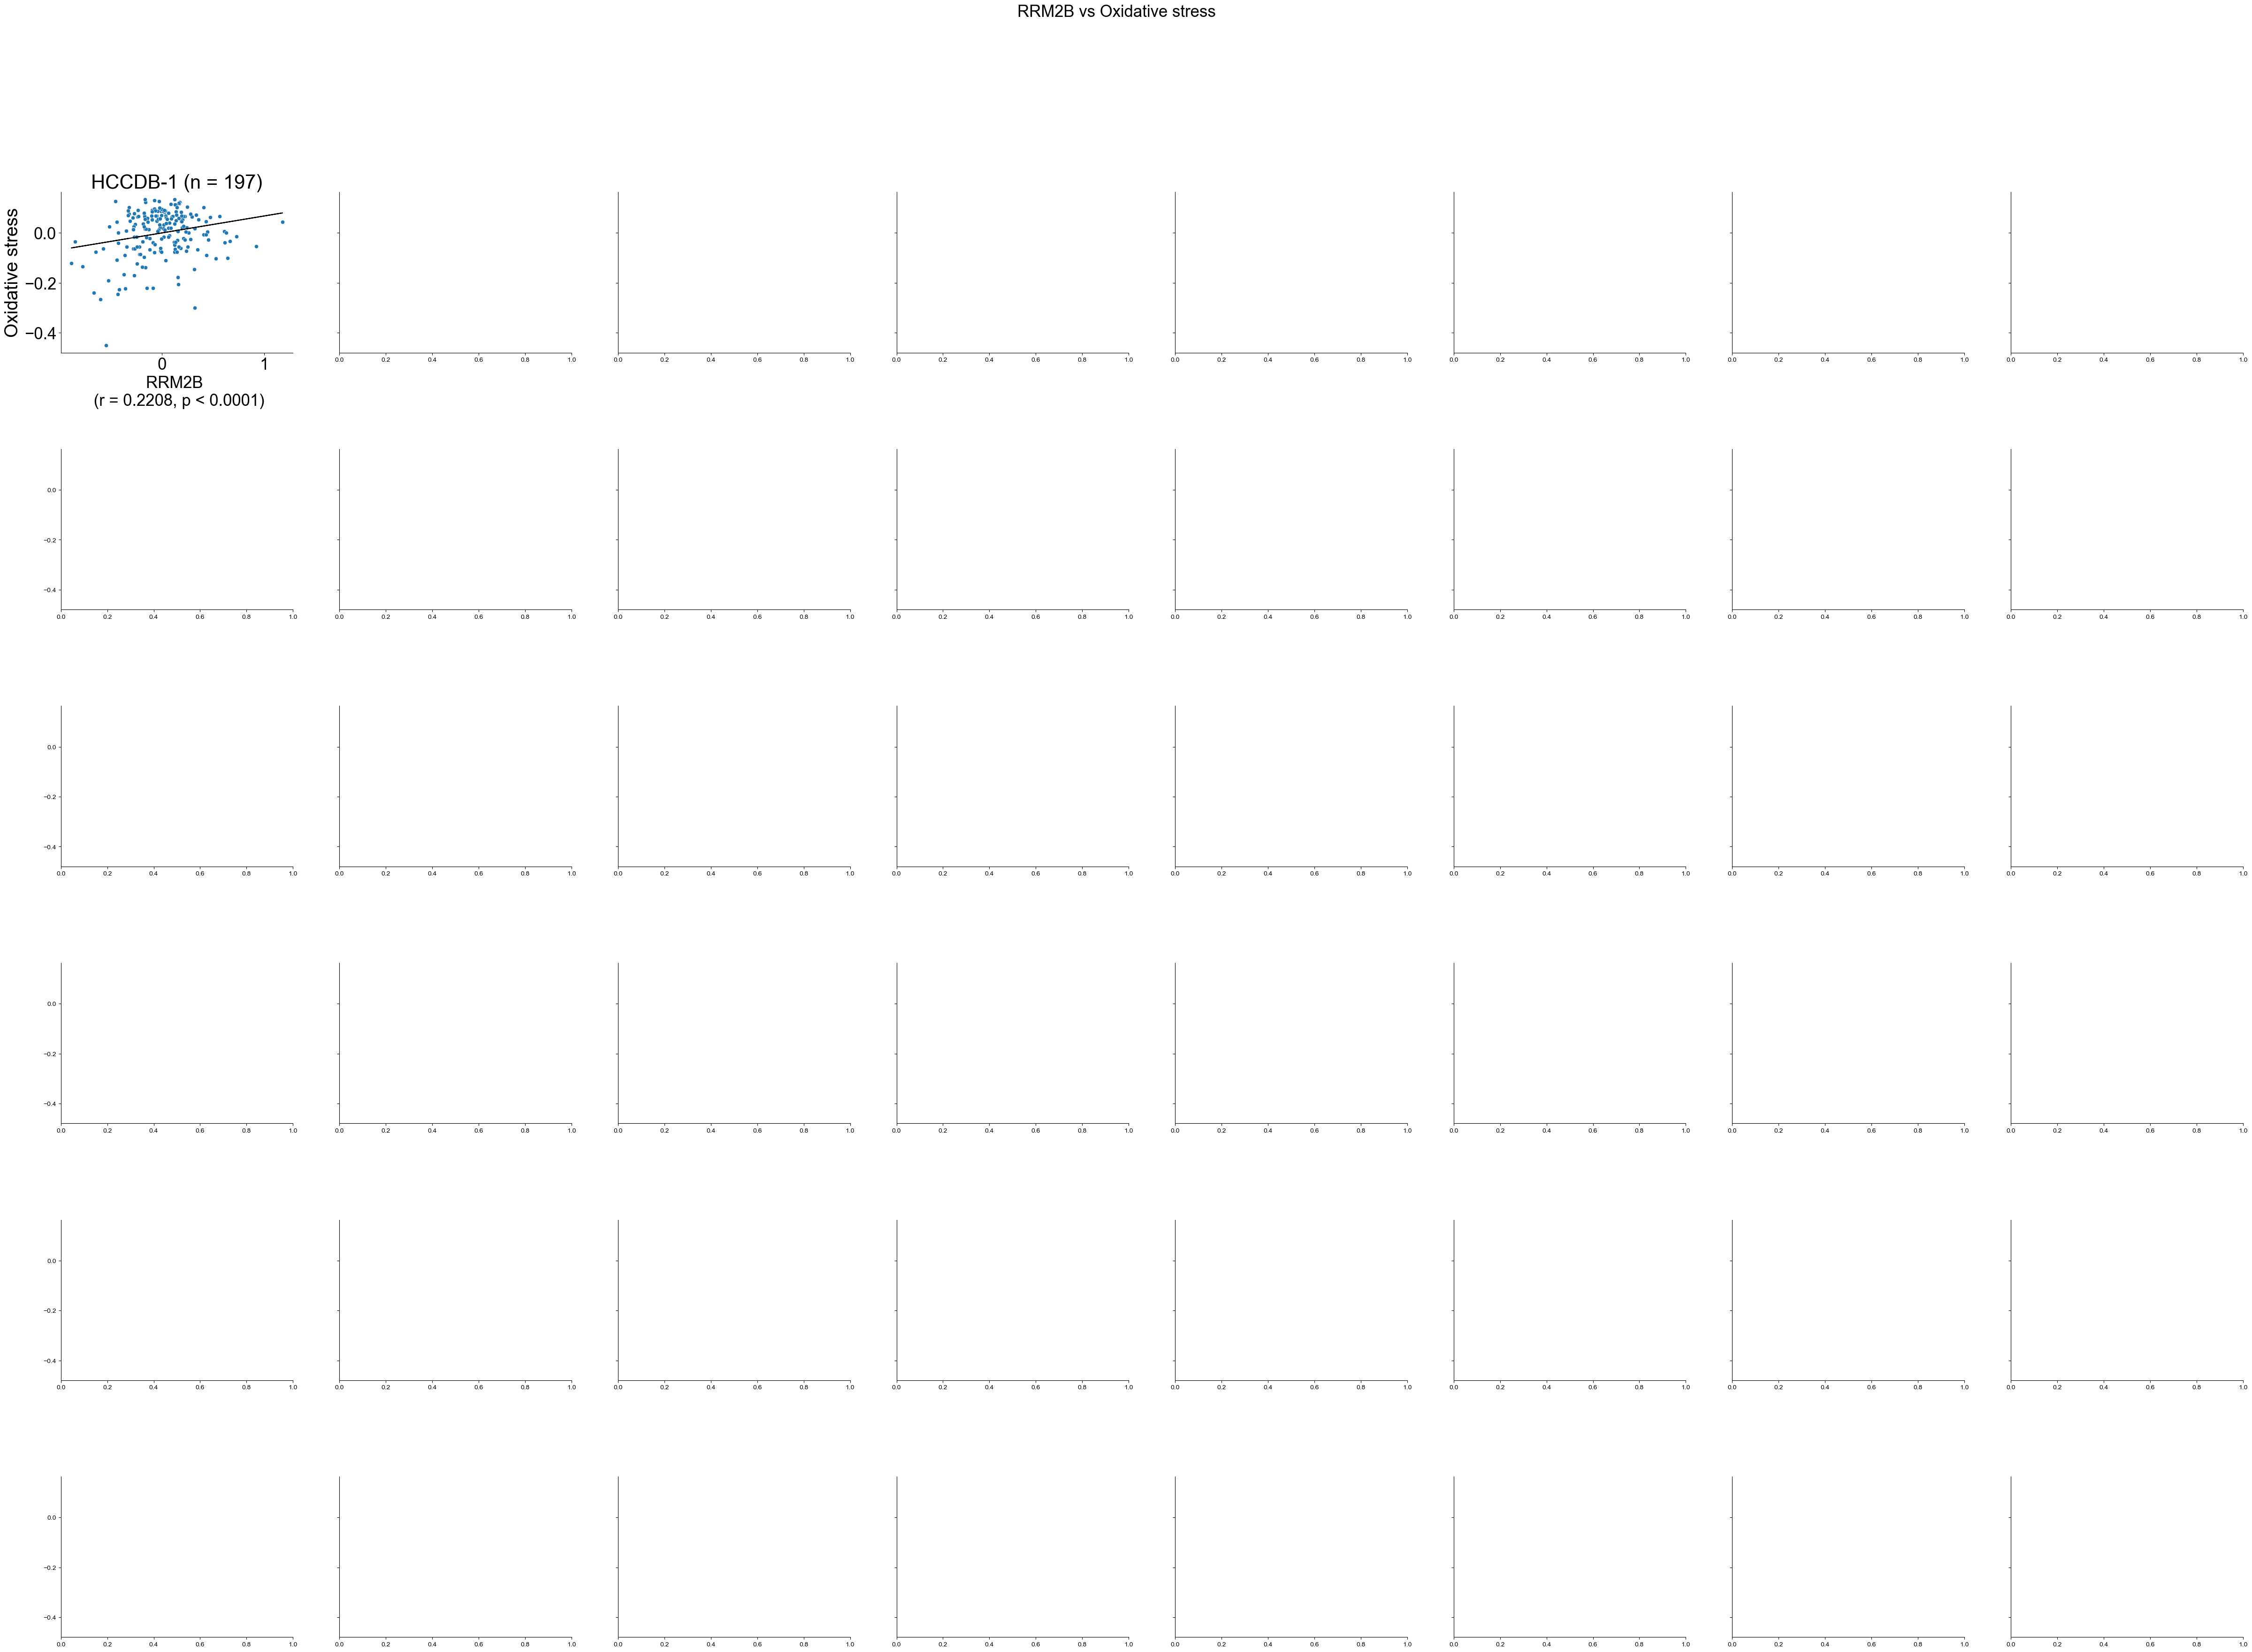

HCCDB-3
HCCDB-3
entering process data
transposed


<Figure size 640x480 with 0 Axes>

HCCDB-4
HCCDB-4
entering process data
transposed


<Figure size 640x480 with 0 Axes>

HCCDB-8
HCCDB-8
entering process data
transposed


<Figure size 640x480 with 0 Axes>

HCCDB-9
HCCDB-9
entering process data
transposed


<Figure size 640x480 with 0 Axes>

HCCDB-11
HCCDB-11
entering process data
transposed


<Figure size 640x480 with 0 Axes>

HCCDB-12
HCCDB-12
entering process data
transposed


<Figure size 640x480 with 0 Axes>

HCCDB-13
HCCDB-13
entering process data
transposed


<Figure size 640x480 with 0 Axes>

HCCDB-14
HCCDB-14
entering process data
transposed


<Figure size 640x480 with 0 Axes>

HCCDB-16
HCCDB-16
entering process data
transposed


<Figure size 640x480 with 0 Axes>

HCCDB-17
HCCDB-17
entering process data
transposed


<Figure size 640x480 with 0 Axes>

HCCDB-18
HCCDB-18
entering process data
transposed


<Figure size 640x480 with 0 Axes>

ACC
ACC
entering process data
transposed


<Figure size 640x480 with 0 Axes>

BLCA
BLCA
entering process data
transposed


<Figure size 640x480 with 0 Axes>

DBLC
DBLC
entering process data
transposed


<Figure size 640x480 with 0 Axes>

UCEC
UCEC
entering process data
transposed


<Figure size 640x480 with 0 Axes>

SKCM
SKCM
entering process data
transposed


<Figure size 640x480 with 0 Axes>

HNSC
HNSC
entering process data
transposed


<Figure size 640x480 with 0 Axes>

PRAD
PRAD
entering process data
transposed


<Figure size 640x480 with 0 Axes>

KIRP
KIRP
entering process data
transposed


<Figure size 640x480 with 0 Axes>

PAAD
PAAD
entering process data
transposed


<Figure size 640x480 with 0 Axes>

SARC
SARC
entering process data
transposed


<Figure size 640x480 with 0 Axes>

CESC
CESC
entering process data
transposed


<Figure size 640x480 with 0 Axes>

COAD
COAD
entering process data
transposed


<Figure size 640x480 with 0 Axes>

LUSC
LUSC
entering process data
transposed


<Figure size 640x480 with 0 Axes>

READ
READ
entering process data
transposed


<Figure size 640x480 with 0 Axes>

KIRC
KIRC
entering process data
transposed


<Figure size 640x480 with 0 Axes>

LIHC
LIHC
entering process data
transposed


<Figure size 640x480 with 0 Axes>

BRCA
BRCA
entering process data
transposed


<Figure size 640x480 with 0 Axes>

OV
OV
entering process data
transposed


<Figure size 640x480 with 0 Axes>

UCS
UCS
entering process data
transposed


<Figure size 640x480 with 0 Axes>

GBM
GBM
entering process data
transposed


<Figure size 640x480 with 0 Axes>

KICH
KICH
entering process data
transposed


<Figure size 640x480 with 0 Axes>

THCA
THCA
entering process data
transposed


<Figure size 640x480 with 0 Axes>

LGG
LGG
entering process data
transposed


<Figure size 640x480 with 0 Axes>

LUAD
LUAD
entering process data
transposed


<Figure size 640x480 with 0 Axes>

MESO
MESO
entering process data
transposed


<Figure size 640x480 with 0 Axes>

PCPG
PCPG
entering process data
transposed


<Figure size 640x480 with 0 Axes>

TGCT
TGCT
entering process data
transposed


<Figure size 640x480 with 0 Axes>

UVM
UVM
entering process data
transposed


<Figure size 640x480 with 0 Axes>

THYM
THYM
entering process data
transposed


<Figure size 640x480 with 0 Axes>

CHOL
CHOL
entering process data
transposed


<Figure size 640x480 with 0 Axes>

ESCA
ESCA
entering process data
transposed


<Figure size 640x480 with 0 Axes>

STAD
STAD
entering process data
transposed


<Figure size 640x480 with 0 Axes>

LAML
LAML
entering process data
transposed


<Figure size 640x480 with 0 Axes>

PANCAN
PANCAN
entering process data
transposed


<Figure size 640x480 with 0 Axes>

done
p53 - Oxidative stress
HCCDB-1
HCCDB-1
entering process data
transposed


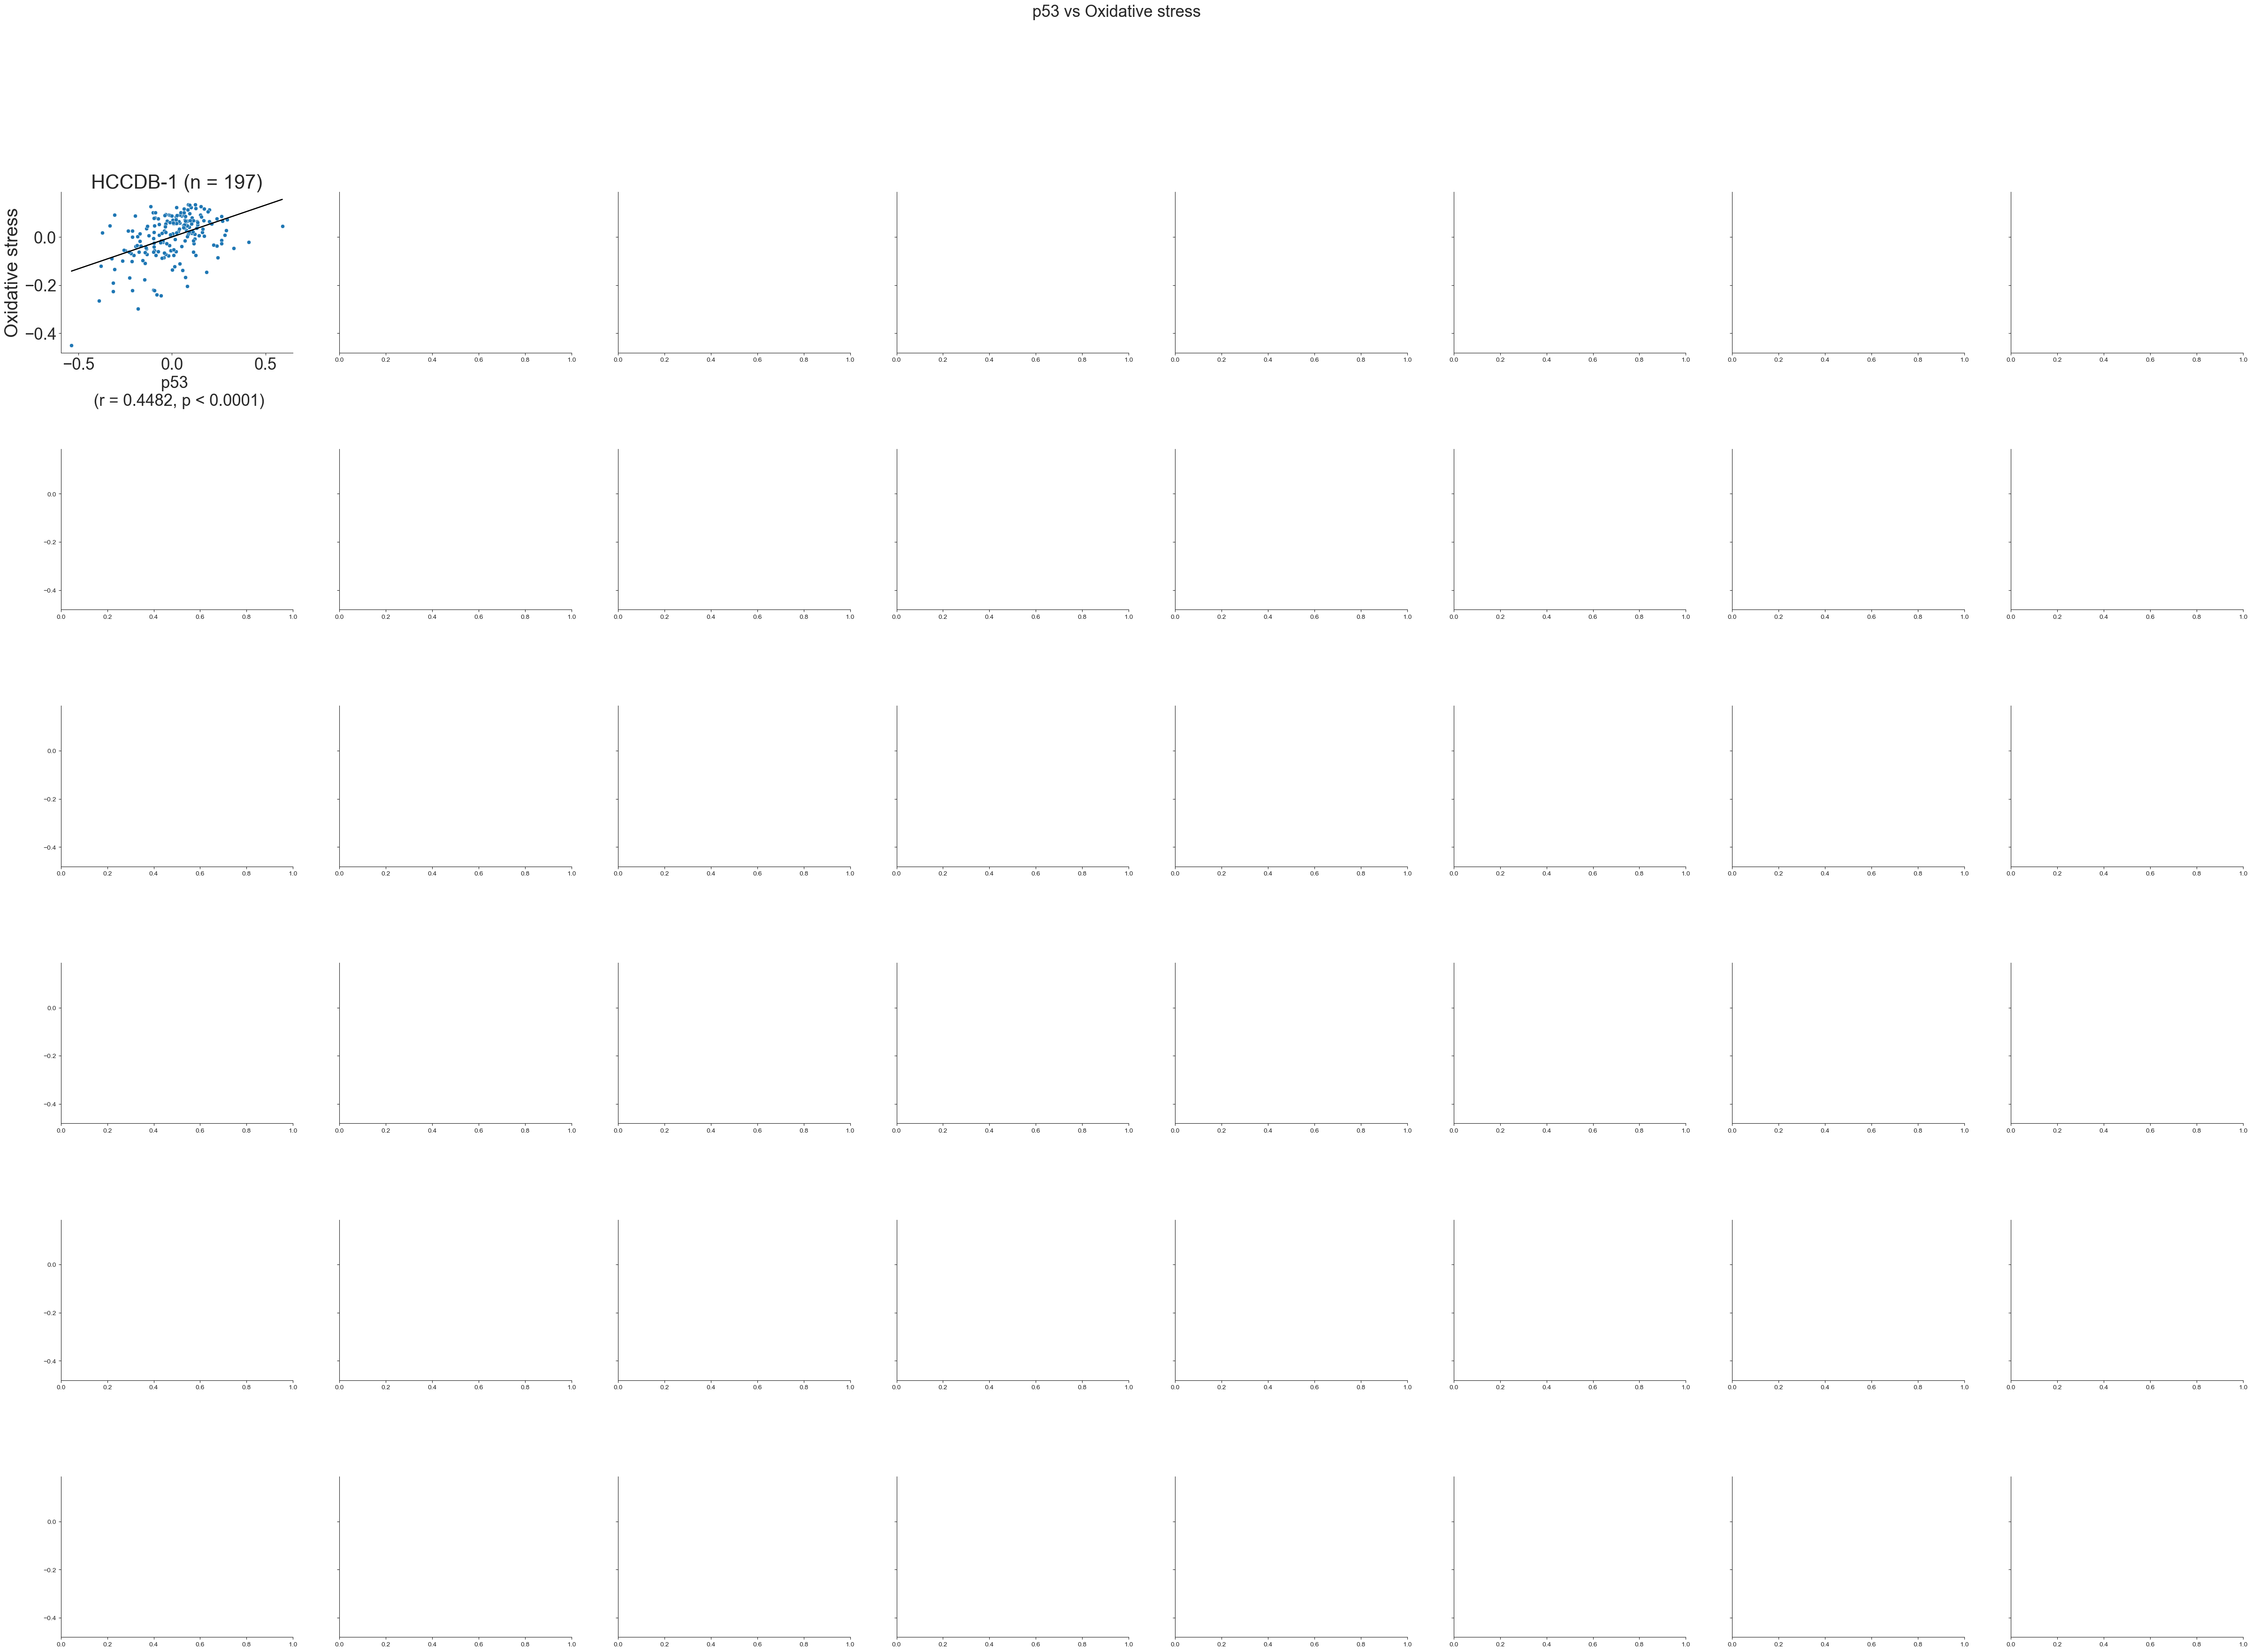

HCCDB-3
HCCDB-3
entering process data
transposed


<Figure size 640x480 with 0 Axes>

HCCDB-4
HCCDB-4
entering process data
transposed


<Figure size 640x480 with 0 Axes>

HCCDB-8
HCCDB-8
entering process data
transposed


<Figure size 640x480 with 0 Axes>

HCCDB-9
HCCDB-9
entering process data
transposed


<Figure size 640x480 with 0 Axes>

HCCDB-11
HCCDB-11
entering process data
transposed


<Figure size 640x480 with 0 Axes>

HCCDB-12
HCCDB-12
entering process data
transposed


<Figure size 640x480 with 0 Axes>

HCCDB-13
HCCDB-13
entering process data
transposed


<Figure size 640x480 with 0 Axes>

HCCDB-14
HCCDB-14
entering process data
transposed


<Figure size 640x480 with 0 Axes>

HCCDB-16
HCCDB-16
entering process data
transposed


<Figure size 640x480 with 0 Axes>

HCCDB-17
HCCDB-17
entering process data
transposed


<Figure size 640x480 with 0 Axes>

HCCDB-18
HCCDB-18
entering process data
transposed


<Figure size 640x480 with 0 Axes>

ACC
ACC
entering process data
transposed


<Figure size 640x480 with 0 Axes>

BLCA
BLCA
entering process data
transposed


<Figure size 640x480 with 0 Axes>

DBLC
DBLC
entering process data
transposed


<Figure size 640x480 with 0 Axes>

UCEC
UCEC
entering process data
transposed


<Figure size 640x480 with 0 Axes>

SKCM
SKCM
entering process data
transposed


<Figure size 640x480 with 0 Axes>

HNSC
HNSC
entering process data
transposed


<Figure size 640x480 with 0 Axes>

PRAD
PRAD
entering process data
transposed


<Figure size 640x480 with 0 Axes>

KIRP
KIRP
entering process data
transposed


<Figure size 640x480 with 0 Axes>

PAAD
PAAD
entering process data
transposed


<Figure size 640x480 with 0 Axes>

SARC
SARC
entering process data
transposed


<Figure size 640x480 with 0 Axes>

CESC
CESC
entering process data
transposed


<Figure size 640x480 with 0 Axes>

COAD
COAD
entering process data
transposed


<Figure size 640x480 with 0 Axes>

LUSC
LUSC
entering process data
transposed


<Figure size 640x480 with 0 Axes>

READ
READ
entering process data
transposed


<Figure size 640x480 with 0 Axes>

KIRC
KIRC
entering process data
transposed


<Figure size 640x480 with 0 Axes>

LIHC
LIHC
entering process data
transposed


<Figure size 640x480 with 0 Axes>

BRCA
BRCA
entering process data
transposed


<Figure size 640x480 with 0 Axes>

OV
OV
entering process data
transposed


<Figure size 640x480 with 0 Axes>

UCS
UCS
entering process data
transposed


<Figure size 640x480 with 0 Axes>

GBM
GBM
entering process data
transposed


<Figure size 640x480 with 0 Axes>

KICH
KICH
entering process data
transposed


<Figure size 640x480 with 0 Axes>

THCA
THCA
entering process data
transposed


<Figure size 640x480 with 0 Axes>

LGG
LGG
entering process data
transposed


<Figure size 640x480 with 0 Axes>

LUAD
LUAD
entering process data
transposed


<Figure size 640x480 with 0 Axes>

MESO
MESO
entering process data
transposed


<Figure size 640x480 with 0 Axes>

PCPG
PCPG
entering process data
transposed


<Figure size 640x480 with 0 Axes>

TGCT
TGCT
entering process data
transposed


<Figure size 640x480 with 0 Axes>

UVM
UVM
entering process data
transposed


<Figure size 640x480 with 0 Axes>

THYM
THYM
entering process data
transposed


<Figure size 640x480 with 0 Axes>

CHOL
CHOL
entering process data
transposed


<Figure size 640x480 with 0 Axes>

ESCA
ESCA
entering process data
transposed


<Figure size 640x480 with 0 Axes>

STAD
STAD
entering process data
transposed


<Figure size 640x480 with 0 Axes>

LAML
LAML
entering process data
transposed


<Figure size 640x480 with 0 Axes>

PANCAN
PANCAN
entering process data
transposed


<Figure size 640x480 with 0 Axes>

done


In [8]:
databases = ['HCCDB-1', 'HCCDB-3', 'HCCDB-4',  'HCCDB-8', 'HCCDB-9', 'HCCDB-11', 
       'HCCDB-12', 'HCCDB-13', 'HCCDB-14', 'HCCDB-16', 'HCCDB-17', 'HCCDB-18',
       'ACC', 'BLCA', 'DBLC', 'UCEC', 'SKCM', 'HNSC', 'PRAD', 'KIRP',
       'PAAD', 'SARC', 'CESC', 'COAD', 'LUSC', 'READ', 'KIRC', 'LIHC',
       'BRCA', 'OV', 'UCS', 'GBM', 'KICH', 'THCA', 'LGG', 'LUAD', 'MESO',
       'PCPG', 'TGCT', 'UVM', 'THYM', 'CHOL', 'ESCA', 'STAD', 'LAML','PANCAN']

r_all = []
p_all = []

testing_conditions = ["RRM2B - Oxidative stress",  "p53 - Oxidative stress"]

# "RRM2B - AOS",
# "RRM2B - NRF2",
#             "RRM2B - G6PD",
#             "RRM2B - p53",
#             "p53 - G6PD",
#             "p53 - NRF2",
#             "p53 - AOS"

for a in testing_conditions:
    print(a)
    x, y = a.split(" - ")
    r , p = gene_corr_databases(x=x, y=y, db=databases)
    r_all.append(r)
    p_all.append(p)

df_r = pd.DataFrame(r_all, columns = databases, index= testing_conditions)
df_p = pd.DataFrame(p_all, columns = databases, index= testing_conditions)

df_r.to_csv("r values cancer screen (final).csv")
df_p.to_csv("p values cancer screen (final).csv")



In [ ]:
# r , p = gene_corr_databases(x="RRM2B", y="AOS", db=databases)
# r_all.append(r)
# p_all.append(p)

# r , p = gene_corr_databases(x="RRM2B", y="Oxidative stress", db=databases)
# r_all.append(r)
# p_all.append(p)

# r , p = gene_corr_databases(x="RRM2B", y="G6PD", db=databases)
# r_all.append(r)
# p_all.append(p)

# r , p = gene_corr_databases(x="RRM2B", y="p53", db=databases)
# r_all.append(r)
# p_all.append(p)

# r , p = gene_corr_databases(x="p53", y="NRF2", db=databases)
# r_all.append(r)
# p_all.append(p)

# r , p = gene_corr_databases(x="p53", y="AOS", db=databases)
# r_all.append(r)
# p_all.append(p)

# r , p = gene_corr_databases(x="p53", y="G6PD", db=databases)
# r_all.append(r)
# p_all.append(p)

In [ ]:
analyses = ["RRM2B - NRF2 sig",
            "RRM2B - AOS sig",
            "RRM2B - G6PD",
            "RRM2B - p53 sig",
            "p53 sig - G6PD",
            ]
aos_set = ['STAD', 'HNSC', 'SARC', 'UCS', 
           'LUSC', 'BRCA','Aggregated']
liver_set = ['LIHC','HCCDB-1', 'HCCDB-3', 'HCCDB-4','HCCDB-9','HCCDB-13','HCCDB-14', 'HCCDB-16', 'HCCDB-17']
p53_set = ['STAD', 'HNSC', 'LUSC']

# def rrm2b_aos(x="RRM2B", y="AOS", db=["PANCAN"]):

#     # master script to screen (publication) cancers for RRM2B - AOS

#     # load gene names
#     gene_set = get_gene_signature_file()
#     x_set, y_set, targets = get_xy_set(gene_set, xvar=x,yvar=y)

#     # load database names
#     databases = db

#     # define subplot grid
#     fig, axs = plt.subplots(2, 4, figsize=(28, 14), sharey=True)
#     plt.subplots_adjust(hspace=0.6)
#     title = 'RRM2B vs antioxidant signature'
#     fig.suptitle(title,fontsize = 25)

#     # main loop
#     for db, ax in zip(databases, axs.ravel()):
#         print(db)
#         df = extract_rows_by_type(data, hccdb, db)
#         data_new = process_data(df, targets, x_var_names = ["RRM2B"], y_var_names = gene_set, pheno_filtered=None, outlier_corrected = True)
#         analyse(data_new, fig, db, ax, title + ' screen (publication).png', x_label = "RRM2B", y_label = "Antioxidant signature", dataset_screen = True)
#         axs[1][3].set_visible(False)
#     print("done")


In [ ]:
# master script to screen cancers for RRM2B - NRF2 signature

gene_set = pd.read_csv("./data/oxstress genes.csv", index_col=None, header= 0)
gene_set = gene_set['NRF2_final'].dropna().tolist()

targets = list(set(["G6PD", "RRM2B"] +  gene_set))

databases = aos_set

# define subplot grid
fig, axs = plt.subplots(2, 4, figsize=(28, 14), sharey=True)
plt.subplots_adjust(hspace=0.5)
title = 'RRM2B vs NRF2 signature'
fig.suptitle(title,fontsize = 25)

for db, ax in zip(databases, axs.ravel()):
    print(db)
    df = extract_rows_by_type(data, hccdb, db)
    data_new = process_data(df, targets, x_var_names = ["RRM2B"], y_var_names = gene_set, pheno_filtered=None, outlier_corrected = True)
    analyse(data_new, fig, db, ax, title + ' screen (publication).png', x_label = "RRM2B", y_label = "NRF2 signature", dataset_screen = True)
    axs[1][3].set_visible(False)
print("done")

In [ ]:
# master script to screen cancers for RRM2B - NRF2 signature

gene_set = pd.read_csv("./data/oxstress genes.csv", index_col=None, header= 0)
gene_set = gene_set['NRF2_final'].dropna().tolist()

targets = list(set(["G6PD", "RRM2B"] +  gene_set))

databases = aos_set

# define subplot grid
fig, axs = plt.subplots(2, 4, figsize=(28, 14), sharey=True)
plt.subplots_adjust(hspace=0.5)
title = 'RRM2B vs NRF2 signature'
fig.suptitle(title,fontsize = 25)

for db, ax in zip(databases, axs.ravel()):
    print(db)
    df = extract_rows_by_type(data, hccdb, db)
    data_new = process_data(df, targets, x_var_names = ["RRM2B"], y_var_names = gene_set, pheno_filtered=None, outlier_corrected = True)
    analyse(data_new, fig, db, ax, title + ' screen (publication).png', x_label = "RRM2B", y_label = "NRF2 signature", dataset_screen = True)
    axs[1][3].set_visible(False)
print("done")

# # master script to screen cancers for RRM2B - p53 signature

# gene_set = pd.read_csv("./data/oxstress genes.csv", index_col=None, header= 0)
# gene_set = gene_set['p53 new'].dropna().tolist()

# targets = list(set(["G6PD", "RRM2B"] +  gene_set))

# databases = ['PANCAN'] # , , 'PANCAN'

# # define subplot grid
# fig, axs = plt.subplots(6, 8, figsize=(60, 40), sharey=True)
# plt.subplots_adjust(hspace=0.6)
# title = 'RRM2B vs p53 signature'
# fig.suptitle(title,fontsize = 25)

# for db, ax in zip(databases, axs.ravel()):
#     print(db)
#     df = extract_rows_by_type(data, hccdb, db)
#     data_new = process_data(df, targets, x_var_names = ["RRM2B"], y_var_names = gene_set, pheno_filtered=None, outlier_corrected = True)
#     analyse(data_new, fig, db, ax, title + ' screen (publication).png', x_label = "RRM2B", y_label = "p53 signature", dataset_screen = True)
# print("done")

# master script to screen cancers for NRF2 signature - p53 signature

gene_set = pd.read_csv("./data/oxstress genes.csv", index_col=None, header= 0)
x_set = gene_set['p53 new'].dropna().tolist()
y_set = gene_set['NRF2_final'].dropna().tolist()

targets = list(set(["G6PD", "RRM2B"] +  x_set + y_set))

databases = p53_set

# define subplot grid
fig, axs = plt.subplots(1, 3, figsize=(25, 10), sharey=True)
plt.subplots_adjust(hspace=0.6)
title = 'NRF2 signature vs p53 signature'
fig.suptitle(title,fontsize = 25)

for db, ax in zip(databases, axs.ravel()):
    print(db)
    df = extract_rows_by_type(data, hccdb, db)
    data_new = process_data(df, targets, x_var_names = x_set, y_var_names = y_set, pheno_filtered=None, outlier_corrected = True)
    analyse(data_new, fig, db, ax, title + ' screen (publication).png', x_label = "p53 signature", y_label = "NRF2 signature", dataset_screen = True)
print("done")


# master script to screen cancers for AOS signature - p53 signature

gene_set = pd.read_csv("./data/oxstress genes.csv", index_col=None, header= 0)
set_x = gene_set['p53 new'].dropna().tolist()
set_y = gene_set['AOS_final'].dropna().tolist()

targets = list(set(["G6PD", "RRM2B"] +  set_x + set_y))

databases = p53_set

# define subplot grid
fig, axs = plt.subplots(1, 3, figsize=(25, 10), sharey=True)
plt.subplots_adjust(hspace=0.6)
title = 'AOS signature vs p53 signature'
fig.suptitle(title,fontsize = 25)

for db, ax in zip(databases, axs.ravel()):
    print(db)
    df = extract_rows_by_type(data, hccdb, db)
    data_new = process_data(df, targets,  set_x, y_var_names = set_y, pheno_filtered=None, outlier_corrected = True)
    analyse(data_new, fig, db, ax, title + ' screen (publication).png', x_label = "p53 signature", y_label = "Antioxidant signature", dataset_screen = True)
print("done")


# master script to screen cancers for p53 signature vs G6PD

gene_set = pd.read_csv("./data/oxstress genes.csv", index_col=None, header= 0)
x_set = gene_set['p53 new'].dropna().tolist()
y_set = gene_set['NRF2_final'].dropna().tolist()

targets = list(set(["G6PD", "RRM2B"] +  x_set + y_set))

databases = liver_set 

# define subplot grid
fig, axs = plt.subplots(2, 5, figsize=(28, 10), sharey=True)
plt.subplots_adjust(hspace=0.6)
title = 'p53 signature vs G6PD'
fig.suptitle(title,fontsize = 25)

for db, ax in zip(databases, axs.ravel()):
    print(db)
    df = extract_rows_by_type(data, hccdb, db)
    data_new = process_data(df, targets, x_var_names = x_set, y_var_names = ["G6PD"], pheno_filtered=None, outlier_corrected = True)
    analyse(data_new, fig, db, ax, title + ' screen liver (publication).png', x_label = "p53 signature", y_label = "G6PD", dataset_screen = True)
    axs[1][4].set_visible(False)
print("done")

# master script to screen cancers for p53 signature vs G6PD

gene_set = pd.read_csv("./data/oxstress genes.csv", index_col=None, header= 0)
x_set = gene_set['p53 new'].dropna().tolist()
y_set = gene_set['NRF2_final'].dropna().tolist()

targets = list(set(["G6PD", "RRM2B"] +  x_set + y_set))

databases = aos_set 

# define subplot grid
fig, axs = plt.subplots(2, 4, figsize=(28, 14), sharey=True)
plt.subplots_adjust(hspace=0.6)
title = 'p53 signature vs G6PD'
fig.suptitle(title,fontsize = 25)

for db, ax in zip(databases, axs.ravel()):
    print(db)
    df = extract_rows_by_type(data, hccdb, db)
    data_new = process_data(df, targets, x_var_names = x_set, y_var_names = ["G6PD"], pheno_filtered=None, outlier_corrected = True)
    analyse(data_new, fig, db, ax, title + ' screen (publication).png', x_label = "p53 signature", y_label = "G6PD", dataset_screen = True)
    axs[1][3].set_visible(False)
print("done")

# master script to screen cancers for RRM2B vs G6PD

targets = ["G6PD", "RRM2B"]

databases = aos_set

# define subplot grid
fig, axs = plt.subplots(2, 4, figsize=(28, 14), sharey=True)
plt.subplots_adjust(hspace=0.6)
title = 'RRM2B vs G6PD'
fig.suptitle(title,fontsize = 25)

for db, ax in zip(databases, axs.ravel()):
    print(db)
    df = extract_rows_by_type(data, hccdb, db)
    data_new = process_data(df, targets,x_var_names = ["RRM2B"], y_var_names = ["G6PD"], pheno_filtered=None, outlier_corrected = True)
    analyse(data_new, fig, db, ax, title + ' screen (publication).png', x_label = "RRM2B", y_label = "G6PD", dataset_screen = True)
    axs[1][3].set_visible(False)
print("done")


In [ ]:
# # master script to screen cancers for RRM2B vs NRF2 signature

# gene_set = pd.read_csv("./data/oxstress genes.csv", index_col=None, header= 0)
# gene_set = gene_set['NRF2_final'].dropna().tolist()

# targets = list(set(["G6PD", "RRM2B"] +  gene_set))

# databases = ['PANCAN', 'COAD'] # , , 'PANCAN'

# # define subplot grid
# fig, axs = plt.subplots(6, 8, figsize=(60, 40), sharey=True)
# plt.subplots_adjust(hspace=0.6)
# title = 'RRM2B vs NRF2 signature'
# fig.suptitle(title,fontsize = 40)

# print("run")
# for db, ax in zip(databases, axs.ravel()):
#     df = extract_rows_by_type(data, hccdb, db)
#     data_new = process_data(df, targets, x_var_names = ["RRM2B"], y_var_names = gene_set, pheno_filtered=None, outlier_corrected = True)
#     analyse(data_new, fig,db, ax, title + ' screen (publication).png', x_label = "RRM2B", y_label = "NRF2 signature", dataset_screen = True)
# print("done")




# # master script to screen cancers for RRM2B expression vs antioxidant activity

# gene_set = pd.read_csv("./data/oxstress genes.csv", index_col=None, header= 0)
# gene_set = gene_set['AOS_final'].dropna().tolist()

# targets = list(set(["G6PD", "RRM2B"] +  gene_set))

# databases = ['PANCAN', 'COAD'] # , , 'PANCAN'

# # define subplot grid
# fig, axs = plt.subplots(6, 8, figsize=(60, 40), sharey=True)
# plt.subplots_adjust(hspace=0.6)
# fig.suptitle('RRM2B vs antioxidant signature',fontsize = 40)

# print("run")
# for db, ax in zip(databases, axs.ravel()):
#     df = extract_rows_by_type(data, hccdb, db)
#     data_new = process_data(df, targets, x_var_names = ["RRM2B"], y_var_names = gene_set, pheno_filtered=None, outlier_corrected = True)
#     # data_new = data_new.loc[data_new["RRM2B"] > -0.4, :] 
#     analyse(data_new, fig, db, ax, title + ' screen (publication).png', x_label = "RRM2B expression", y_label = "Antioxidant signature", x_target = 'RRM2B', y_target = 'y_composite_score', dataset_screen = True )
# print("done")
